# Joyplots

In [2]:
!pip install joypy -q

In [3]:
import joypy

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm

## Obligatory iris stuff

Though not a great fit for this kind of visualization, we can generate some joyplots with the `iris` dataset.

In [4]:
path1 = 'https://frenzy86.s3.eu-west-2.amazonaws.com/python/data/iris2.csv'

In [5]:
iris = pd.read_csv(path1)
iris

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


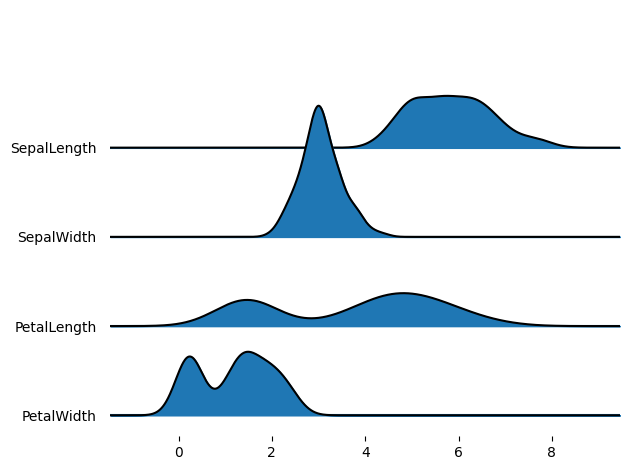

In [6]:
fig, axes = joypy.joyplot(iris)

If you pass a grouped dataframe, or if you pass a column name to the `by` argument, you get a density plot
for each value in the grouped column.

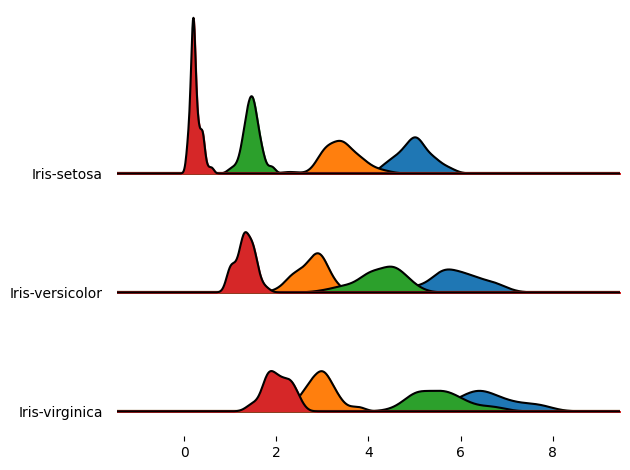

In [7]:
fig, axes = joypy.joyplot(iris, by="Name")

In the previous plot, one subplot had a much larger `y` extensions than the others.
Since, by default, the subplots share the `y`-limits, the outlier causes all the other subplots to be quite
compressed.

We can change this behavior letting each subplot take up the whole `y` space with `ylim='own'`, as follows.

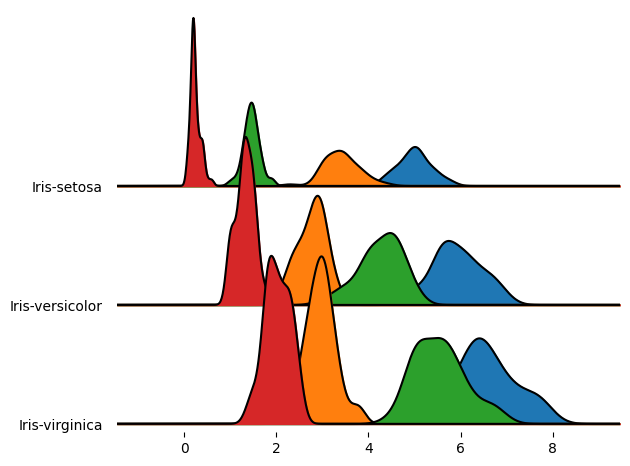

In [8]:
fig, axes = joypy.joyplot(iris, by="Name", ylim='own')

In this case, we achieved more overlap, but the subplots are no longer directly comparable.

Yet another option is to keep the default ylim behavior (i.e., `ylim='max'`),
and simply increase the overlap factor:

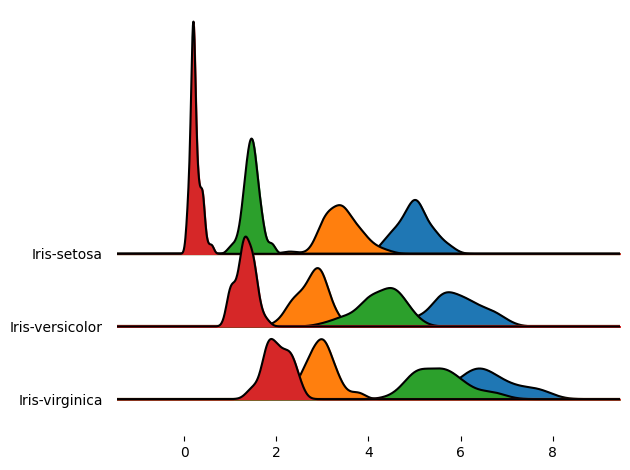

In [9]:
fig, axes = joypy.joyplot(iris, by="Name", overlap=3)

It's also possible to draw histograms with `hist=True`, though they don't look nice when overlapping,
so it's better to set `overlap=0`.

With `grid=True` or `grid='both'` you also get grid lines on both axis.

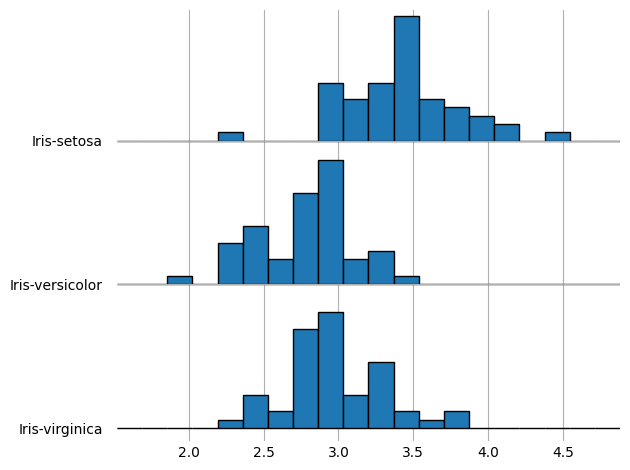

In [10]:
fig, axes = joypy.joyplot(iris, by="Name",
                          column="SepalWidth",
                          hist=True,
                          bins=20,
                          overlap=0,
                          grid=True,
                          legend=False
                          )

## Global daily temperatures

Something that is probably a better fit for joyplots than `iris`: let's visualize the distribution of
global daily temperatures from 1880 to 2014.

(The original file can be found [here](http://berkeleyearth.org/data/))

In [11]:
path2 ='https://frenzy86.s3.eu-west-2.amazonaws.com/python/data/daily_temp.csv'

In [12]:
temp = pd.read_csv(path2,comment="%")
temp.head()

,Date Number,Year,Month,Day,Day of Year,Anomaly
0,1880.001,1880,1,1,1,-0.808
1,1880.004,1880,1,2,2,-0.670
2,1880.007,1880,1,3,3,-0.740
3,1880.010,1880,1,4,4,-0.705
4,1880.012,1880,1,5,5,-0.752


The column `Anomaly` contains the global daily temperature (in °C) computed as the difference between the
daily value and the 1950-1980 global average.
We can draw the distribution of the temperatures in time, grouping by `Year`, to see
how the daily temperature distribution shifted across time.

Since the `y` label would get pretty crammed if we were to show all the year labels, we first prepare
a list where we leave only the multiples of 10.

To reduce the clutter, the option `range_style='own'` limits
the `x` range of each individual density plot to the range where the density is non-zero
(+ an "aestethic" tolerance to avoid cutting the tails too early/abruptly),
rather than spanning the whole `x` axis.

The option `colormap=cm.autumn_r` provides a colormap to use along the plot.

(Grouping the dataframe and computing the density plots can take a few seconds here.)

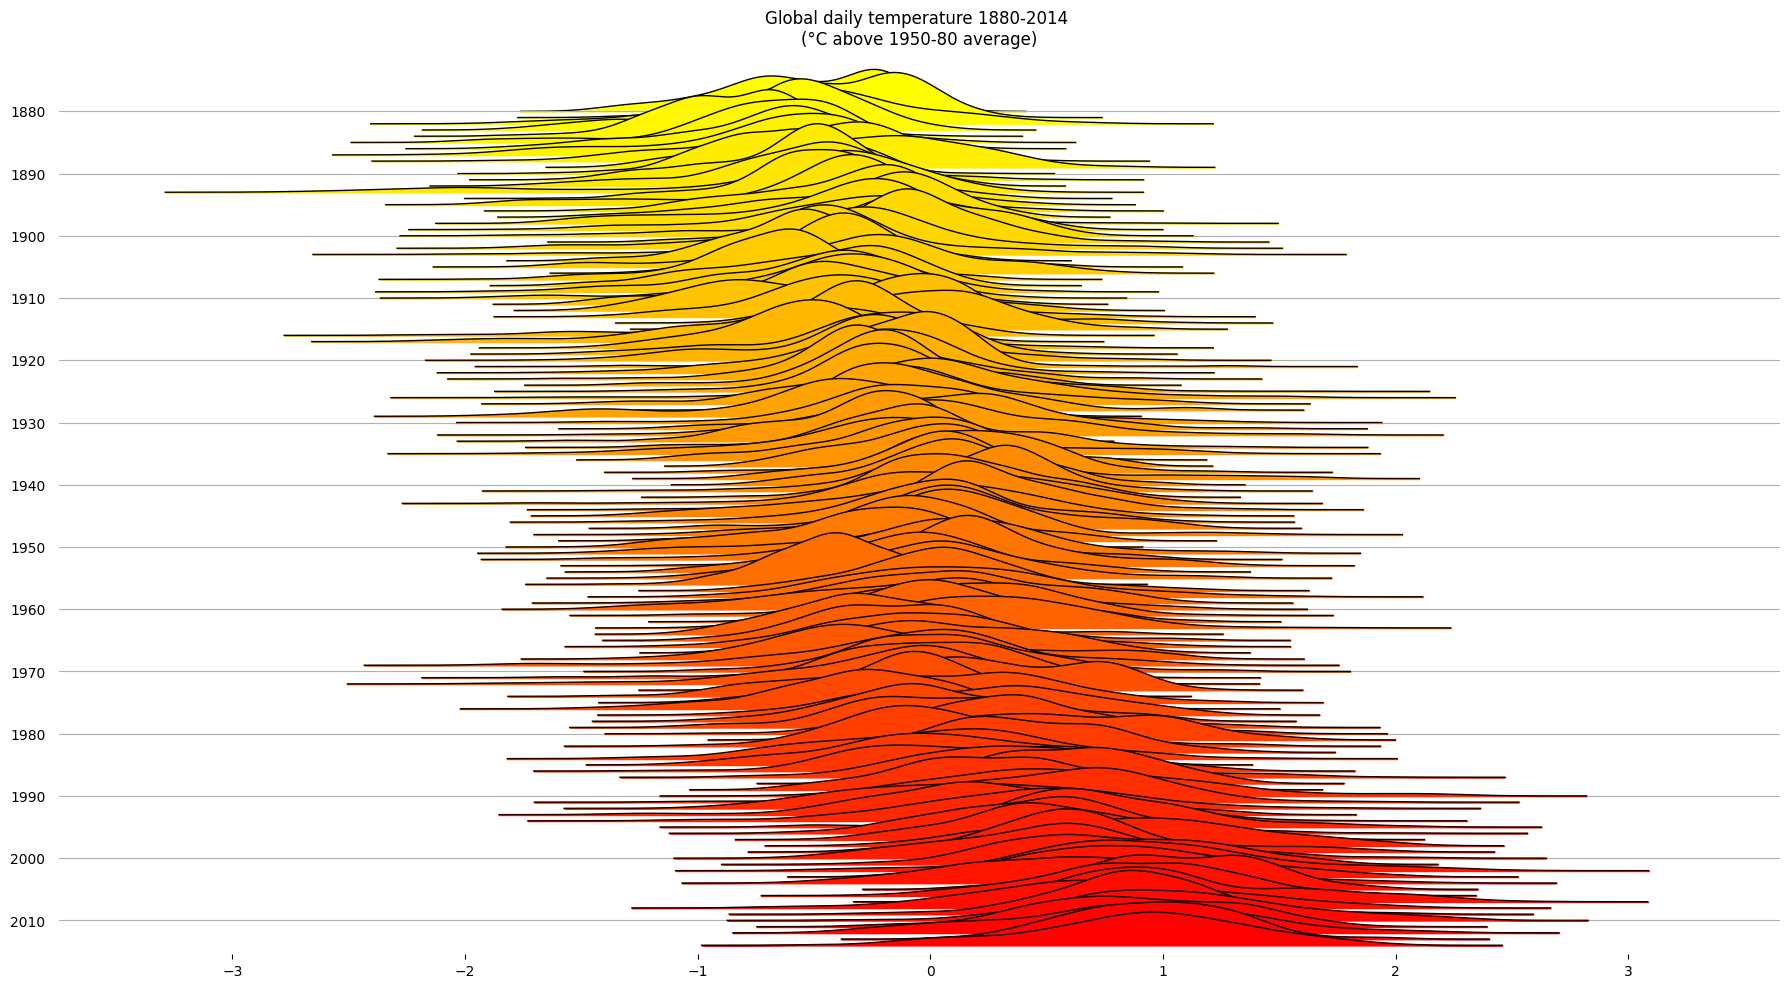

In [13]:
labels=[y if y%10==0 else None for y in list(temp.Year.unique())]

fig, ax = joypy.joyplot(temp,
                        by="Year",
                        column="Anomaly",
                        labels=labels,
                        range_style='own',
                        grid="y",
                        linewidth=1,
                        legend=False,
                        figsize=(18,10),
                        title="Global daily temperature 1880-2014 \n(°C above 1950-80 average)",
                        colormap=cm.autumn_r,
                        )

If you want, you can also plot the raw counts, rather than the estimated density.
This results in noisier plots, but it might be preferable in some cases.

With `fade=True`, the subplots get a progressively larger alpha value.

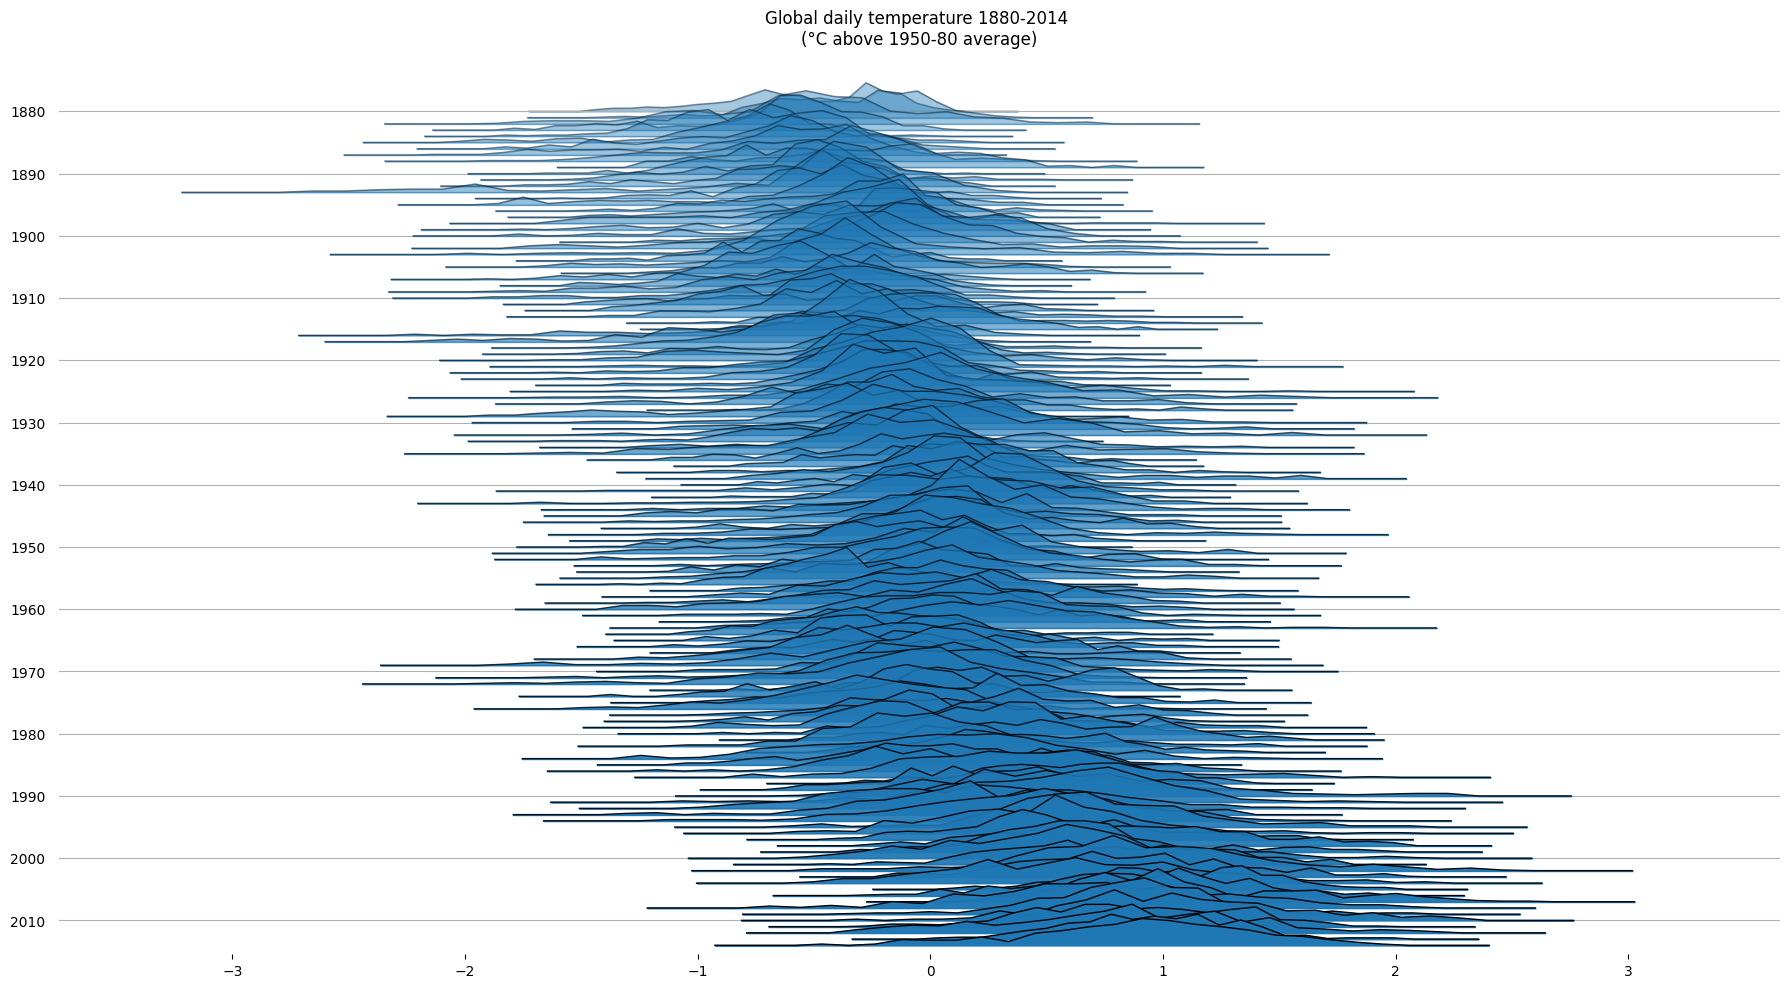

In [14]:
labels=[y if y%10==0 else None for y in list(temp.Year.unique())]

fig, axes = joypy.joyplot(temp, by="Year",
                          column="Anomaly",
                          labels=labels,
                          range_style='own',
                          grid="y",
                          linewidth=1,
                          legend=False,
                          fade=True,
                          figsize=(18,10),
                          title="Global daily temperature 1880-2014 \n(°C above 1950-80 average)",
                          kind="counts", bins=30)

Just for fun, let's plot the same data as it were on the cover of Unknown Pleasures,
the Joy Division's album where the nickname to this kind of visualization comes from.

No labels/grids, no filling, black background, white lines, and a couple of adjustments just to make it look a bit more like the album cover.

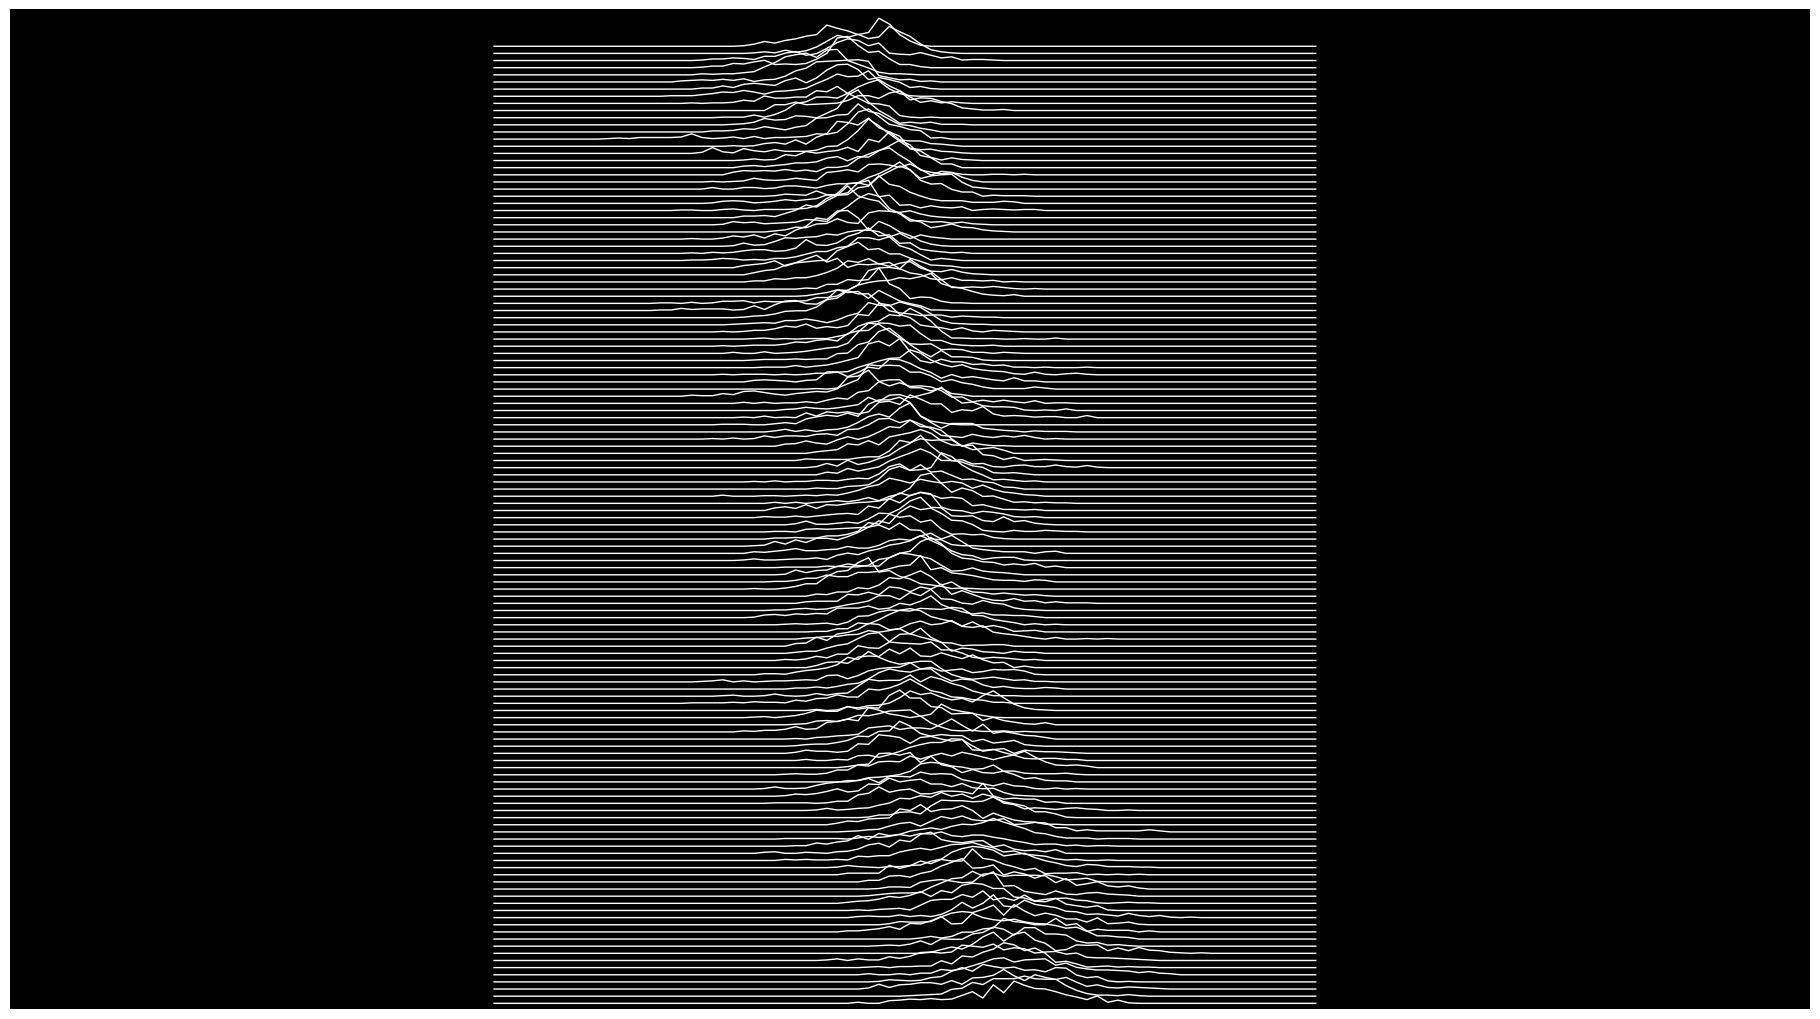

In [15]:
fig, axes = joypy.joyplot(temp,by="Year", column="Anomaly", ylabels=False, xlabels=False,
                          grid=False, fill=False, background='k', linecolor="w", linewidth=1,
                          legend=False, overlap=0.5, figsize=(18,10),kind="counts", bins=80)

plt.subplots_adjust(left=0, right=1, top=1, bottom=0)
for a in axes[:-1]:
    a.set_xlim([-8,8])

## NBA players - regular season stats

The files can be obtained from Kaggle datasets

In [16]:
path3 = "https://frenzy86.s3.eu-west-2.amazonaws.com/python/data/Players.csv"

In [17]:
players = pd.read_csv(path3,index_col=0)
players

,Player,height,weight,collage,born,birth_city,birth_state
0,Curly Armstrong,180.0,77.0,Indiana University,1918.0,NaN,NaN
1,Cliff Barker,188.0,83.0,University of Kentucky,1921.0,Yorktown,Indiana
2,Leo Barnhorst,193.0,86.0,University of Notre Dame,1924.0,NaN,NaN
3,Ed Bartels,196.0,88.0,North Carolina State University,1925.0,NaN,NaN
4,Ralph Beard,178.0,79.0,University of Kentucky,1927.0,Hardinsburg,Kentucky
...,...,...,...,...,...,...,...
3917,Troy Williams,198.0,97.0,South Carolina State University,1969.0,Columbia,South Carolina
3918,Kyle Wiltjer,208.0,108.0,Gonzaga University,1992.0,Portland,Oregon
3919,Stephen Zimmerman,213.0,108.0,"University of Nevada, Las Vegas",1996.0,Hendersonville,Tennessee
3920,Paul Zipser,203.0,97.0,NaN,1994.0,Heidelberg,Germany


In [18]:
path4 = "https://frenzy86.s3.eu-west-2.amazonaws.com/python/data/Seasons_Stats.csv"

In [19]:
seasons = pd.read_csv(path4, index_col=0)
seasons.head()

,Year,Player,Pos,Age,Tm,G,GS,MP,PER,TS%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,1950.0,Curly Armstrong,G-F,31.0,FTW,63.0,NaN,NaN,NaN,0.368,...,0.705,NaN,NaN,NaN,176.0,NaN,NaN,NaN,217.0,458.0
1,1950.0,Cliff Barker,SG,29.0,INO,49.0,NaN,NaN,NaN,0.435,...,0.708,NaN,NaN,NaN,109.0,NaN,NaN,NaN,99.0,279.0
2,1950.0,Leo Barnhorst,SF,25.0,CHS,67.0,NaN,NaN,NaN,0.394,...,0.698,NaN,NaN,NaN,140.0,NaN,NaN,NaN,192.0,438.0
3,1950.0,Ed Bartels,F,24.0,TOT,15.0,NaN,NaN,NaN,0.312,...,0.559,NaN,NaN,NaN,20.0,NaN,NaN,NaN,29.0,63.0
4,1950.0,Ed Bartels,F,24.0,DNN,13.0,NaN,NaN,NaN,0.308,...,0.548,NaN,NaN,NaN,20.0,NaN,NaN,NaN,27.0,59.0


Join the dataframes and filter:
- years starting from the 3 point line introduction (1979-80)
- player seasons with at least 10 field goal attempts.

In [20]:
joined = seasons.merge(players, on="Player")
threepoints = joined[(joined.Year > 1979) & (joined["FGA"] > 10)].sort_values("Year")
threepoints["3Pfract"] = threepoints["3PA"]/threepoints.FGA
threepoints[["3Pfract","Year"]]

,3Pfract,Year
5727,0.000723,1980.0
5970,0.000000,1980.0
5969,0.000000,1980.0
5968,0.000000,1980.0
5967,0.002217,1980.0
...,...,...
24290,0.650591,2017.0
24291,0.002967,2017.0
24292,0.375000,2017.0
24285,0.001603,2017.0


The fraction of 3 pointers attempted by each player in a season has clearly shifted a lot.  
In today's NBA there's a good number of players who take 40% or more of their shots from behind the line.

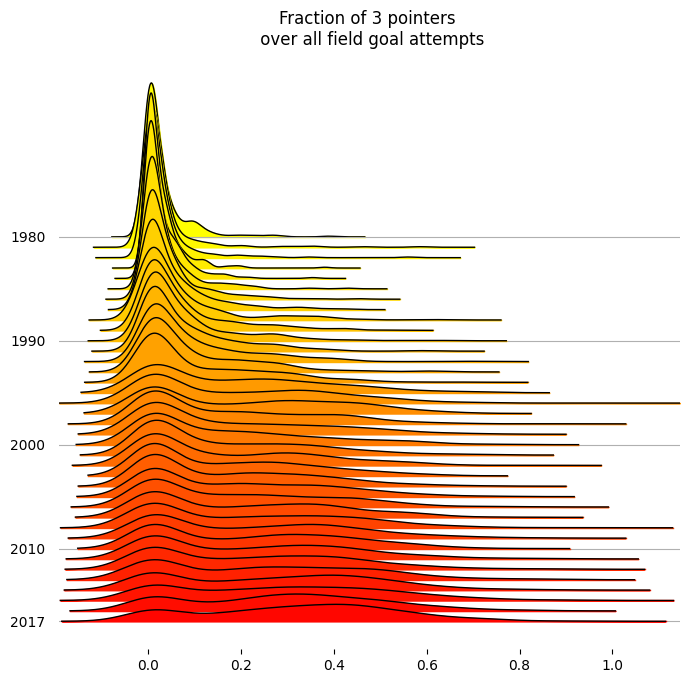

In [21]:
decades = [int(y) if y%10==0 or y == 2017 else None for y in threepoints.Year.unique()]
fig, axes = joypy.joyplot(threepoints, by="Year", column="3Pfract",
                  kind="kde",
                  range_style='own', tails=0.2,
                  overlap=3, linewidth=1, colormap=cm.autumn_r,
                  labels=decades, grid='y', figsize=(7,7),
                  title="Fraction of 3 pointers \n over all field goal attempts")

In this last plot, the distributions of the 3P percentages across the players
are drawn as raw binned counts.

With `kind=normalized_counts`, the values are normalized
over the occurrences in each year: this is probably needed here, because that the number of teams and players
in the NBA has grown during the years.

The median NBA player has become a much better 3P shooter.

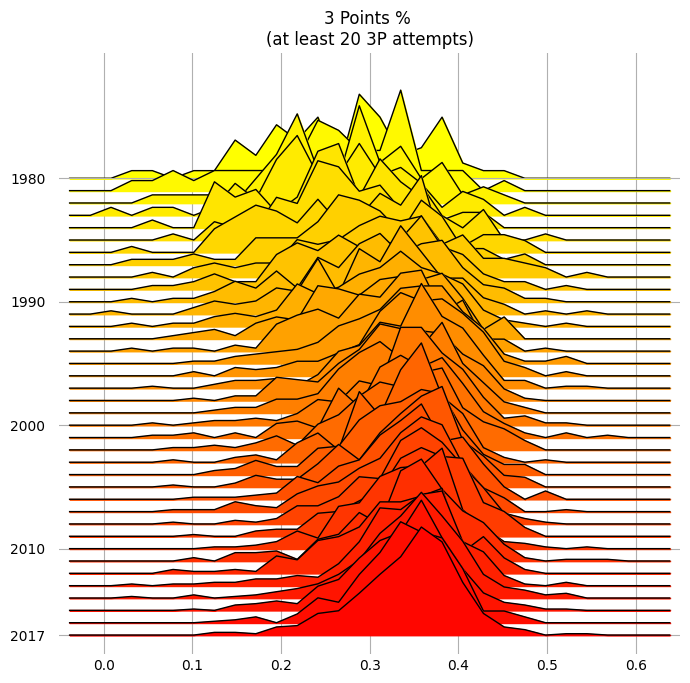

In [22]:
threepoint_shooters = threepoints[threepoints["3PA"] >= 20]
decades = [int(y) if y%10==0 or y == 2017 else None for y in threepoint_shooters.Year.unique()]
fig, axes = joypy.joyplot(threepoint_shooters, by="Year", column="3P%",
                   kind="normalized_counts", bins=30,
                   range_style='all', x_range=[-0.05,0.65],
                   overlap=2, linewidth=1, colormap=cm.autumn_r,
                   labels=decades, grid='both', figsize=(7,7),
                   title="3 Points % \n(at least 20 3P attempts)")

# Plotting with pre-aggregated data

In case you have already aggregated data and you just want to plot them as a joyplot, you can still use joypy.

Suppose we have a bunch of aggregated visit counts for each hour of the day.

In [23]:
np.random.seed(42)
df = pd.DataFrame(np.random.poisson(10,(24,7)))
df.columns = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
df.head()

,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
0,12,6,11,14,7,8,9
1,11,8,10,7,11,11,8
2,12,6,7,8,10,5,3
3,9,13,8,6,13,12,13
4,9,14,8,8,12,15,13


To plot them, simply call `joyplot()` with the option `kind=values`.
Note that you need to manually handle some stuff about the range of the x-axis and the x ticks.

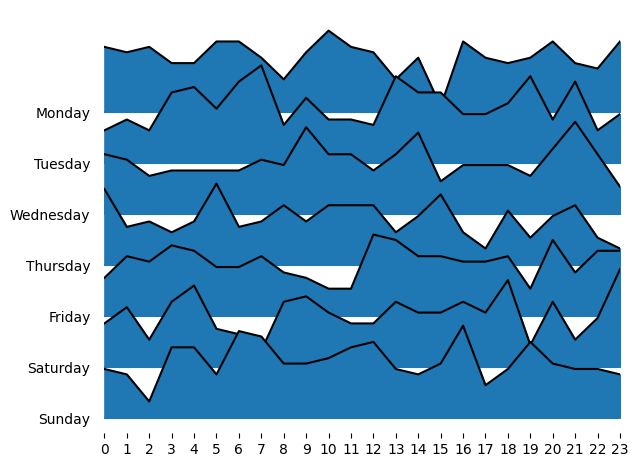

In [24]:
x_range = list(range(24))
fig, axes = joypy.joyplot(df, kind="values", x_range=x_range)
axes[-1].set_xticks(x_range);

# Plotting with raw data (not in a dataframe)

Joypy can also be used to plot data not contained in a pandas dataframe. The simplest structure we can use is actually a list of lists or arrays.

In [25]:
x = np.arange(0,100,0.1)
y =[n*x for n in range(1,4)]

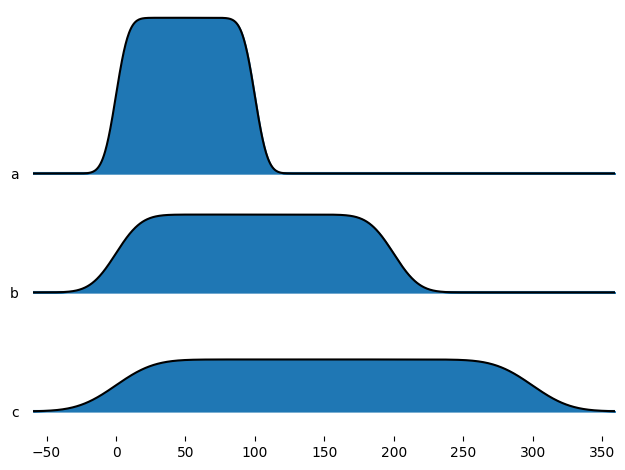

In [26]:
fig, ax = joypy.joyplot(y, labels=["a","b","c"])

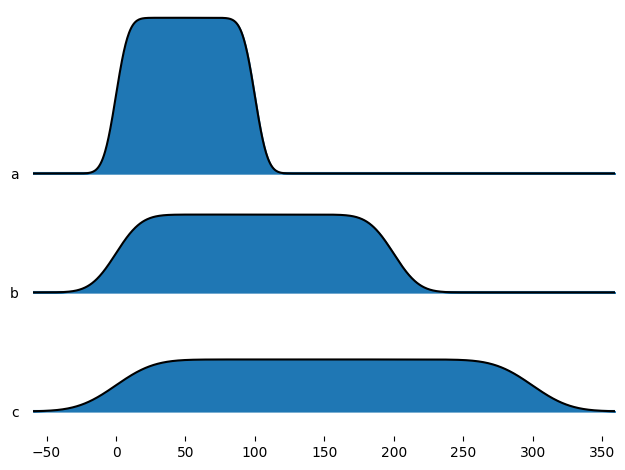

In [27]:
labels = ["a","b","c"]
d = {l:v for l,v in zip(labels,y)}
fig, ax = joypy.joyplot(d)

# On colors

Colors can be specified with combinations of the arguments `fill`, `color`, `linecolor`, `colormap`.

A few minimal examples below.

By default, the arguments are:
- `fill=True`
- `color=None`
- `linecolor=None`
- `colormap=None`.


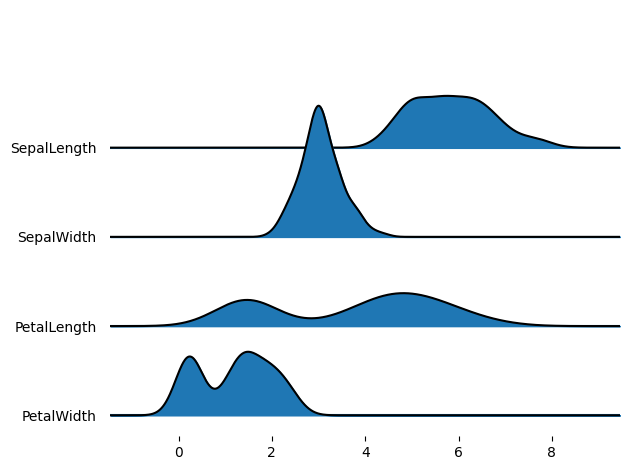

In [28]:
fig, axes = joypy.joyplot(iris)

With the default `fill=True`, `color` or `colormap` are used to set the fill color and `linecolor` is used to set the line color.

If both `color` and `colormap` are passed, `color` has the precedence.

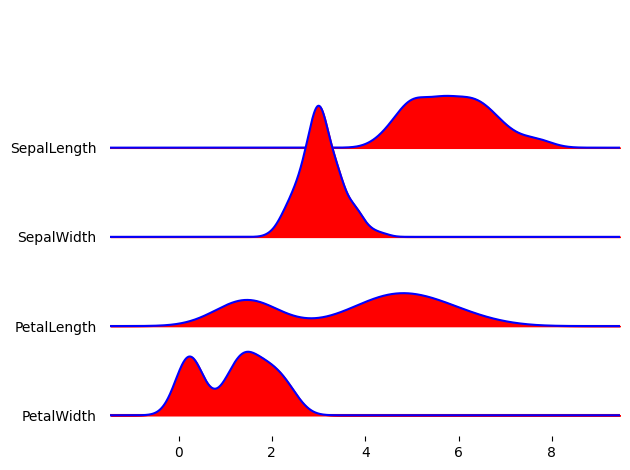

In [29]:
fig, axes = joypy.joyplot(iris, color="red", linecolor="blue")

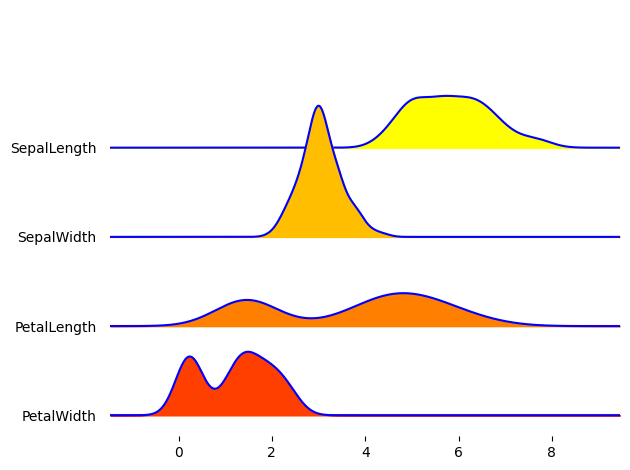

In [30]:
fig, axes = joypy.joyplot(iris, linecolor="blue", colormap=cm.autumn_r)

With `fill=False`, the color of the line can be set in 3 ways: `color`, `linecolor`, `colormap`.
If more than one argument is passed, the precedence is `linecolor` > `color` > `colormap`.

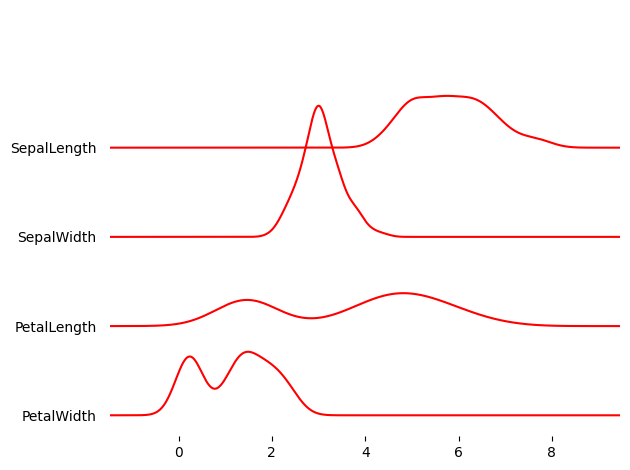

In [31]:
fig, axes = joypy.joyplot(iris, fill=False, color="r")

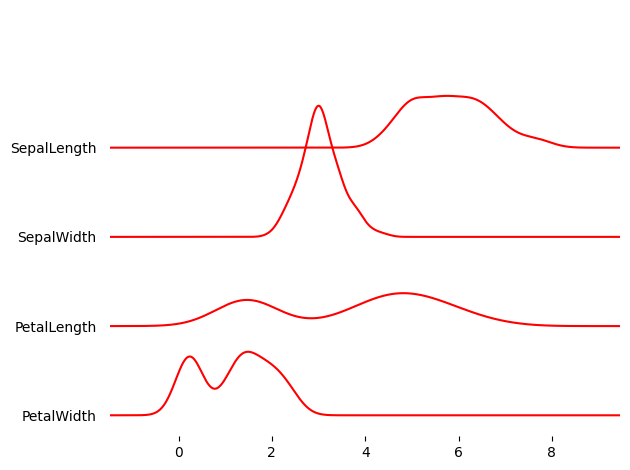

In [32]:
fig, axes = joypy.joyplot(iris, fill=False, linecolor="r")

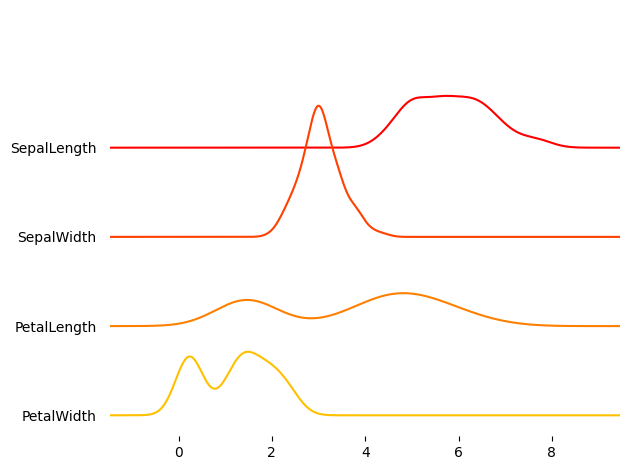

In [33]:
fig, axes = joypy.joyplot(iris,fill=False, colormap=cm.autumn)

If more than one argument is passed, the precedence goes `linecolor` > `color` > `colormap`.

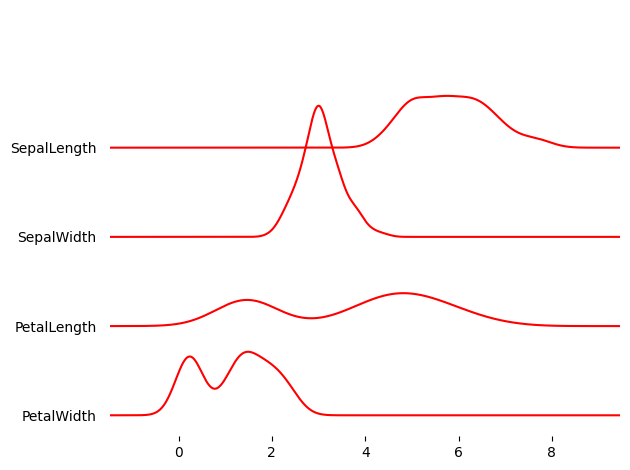

In [34]:
fig, axes = joypy.joyplot(iris, fill=False, linecolor="r", color="g", colormap=cm.autumn)

When grouping the dataframe with the argument `by`, you can pass a list of colors
with the same size of the colums you want to plot.

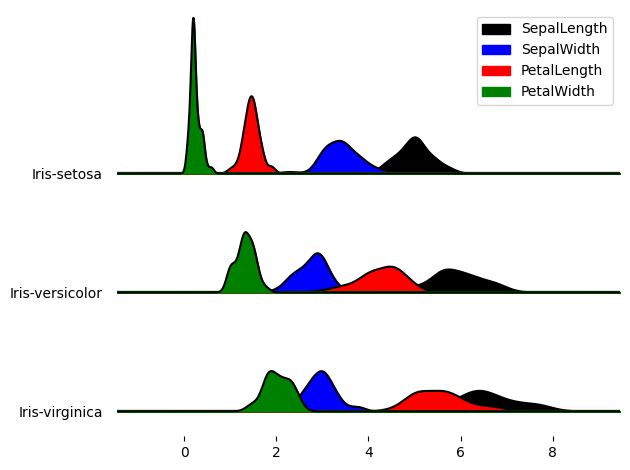

In [35]:
fig, axes = joypy.joyplot(iris,fill=True, legend=True, by="Name", color=["k","b","r","g"])

You can do the same with colormaps, although the resulting plot might be rather hard to parse.  
Note also that the legend only uses the color in the first subplot.

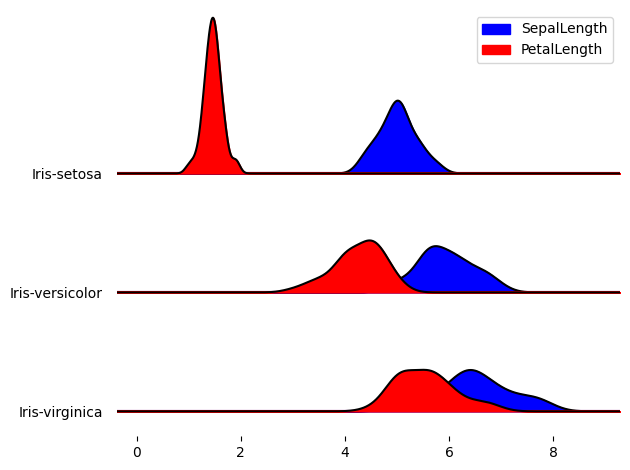

In [36]:
fig, axes = joypy.joyplot(iris,fill=True,
                          legend=True,
                          by="Name",
                          column=["SepalLength","PetalLength"],
                          color=['b','r']
                          )